In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pynfft.nfft import NFFT

def funcao_nfft(x, f_hat):
    N = [16, 16]  # Domínio da frequência (2D)
    M = len(x)        # Número de amostras
    plan = NFFT(N, M)
    plan.x = x
    plan.precompute()  # Pré-computação

    plan.f_hat = f_hat
    # Transformada direta: f_hat -> f
    f = plan.trafo()

    # Transformada adjunta: f -> f_hat
    #plan.f = f
    #f_hat_reconstructed = plan.adjoint()
    return f

def funcao_plot(x):
    plt.figure(figsize=(6, 6))
    plt.scatter(x[:, 0], x[:, 1], color='blue', label='Amostras')
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.xlim([-0.5, 0.5])
    plt.ylim([-0.5, 0.5])
    plt.title("Espaço Amostral 2D")
    plt.xlabel("Coordenada x")
    plt.ylabel("Coordenada y")
    plt.legend()
    plt.grid()
    plt.show()

def lino(M,N):
    result = []
    for I in range(-M//2, M//2):
        x = (2*np.pi*I)/M
        for J in range(-N//4+1, N//4 +1):
            y = ((2*np.pi*I)/M) * ((4*J)/N)
            par = [x,y]
            result.append(par)
    return result


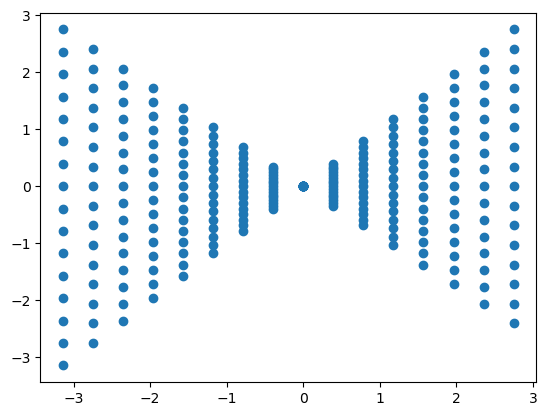

In [10]:
#gerar um novo x e f_hat:
N = [16, 16]  # Domínio da frequência (2D)
M = 96        # Número de amostras
x1 = np.random.rand(M, 2) - 0.5
f_hat = np.random.rand(N[0], N[1]) + 1j * np.random.rand(N[0], N[1])

#agora para x2
#dados das amostras do lino
M_lino = 16
N_lino = 32
pares_ordenados = lino(M_lino, N_lino)
#aqui eu preciso separar os valores de x e os valores de y
x_valores = [par[0] for par in pares_ordenados]
y_valores = [par[1] for par in pares_ordenados]

plt.plot(x_valores, y_valores, marker='o', linestyle=' ')

#Aqui, organizar de forma diferente
x2 = lino(16,32)#de pares ordenados [(x,y), (x,y), (x,y), ...]
x2_array = np.array(x2)#para uma array

#normalizar
x2_array_normalizado = x2_array/(2 * np.pi)
M = len(x2_array_normalizado)
f_x2 = np.random.rand(M) + 1j * np.random.rand(M)  # Dados complexos



In [11]:
print(type(x2_array_normalizado))
print(len(x2_array_normalizado))

<class 'numpy.ndarray'>
256


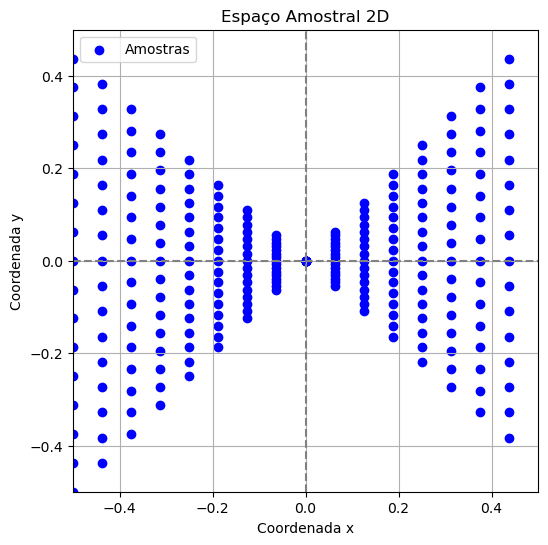

In [12]:
funcao_plot(x2_array_normalizado)

In [13]:
funcao_nfft(x2_array_normalizado, f_x2)

array([ 6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134761e-310+6.33134761e-310j,
        6.33134750e-310+6.33134750e-310j,
        6.33134750e-310+6.33134750e-310j,
        6.33134750e-310+6.33134750e-310j,
        6.33134750e-310+6.33134750e-310j,
        6.33134750e-310+6.33134750e-310j,
        6.33134750e-310+6.33134756e-310j,
        6.33134756e-310+6.33134756e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134752e-310j,
        6.33134752e-310+6.33134751e-310j,
        6.33134751e-310+6.33134751e-310j,
        6.33134751e-310+6.33134751e-310j,
        6.33134751e-310+6.33134751

In [14]:
funcao_nfft(x1, f_hat)

array([  1.30059703 +3.86039214j,  -2.04921059 -0.73005625j,
        -2.36856495 +4.01105099j,  -7.57595744 +0.47719866j,
        -1.33153128 +2.20955633j,   4.79798289 +3.38931911j,
         1.62722874 +8.00620184j,  -4.35261088 -3.39732233j,
         4.00865751 -8.71399625j,  -3.12732712 +1.9356793j ,
         6.08454342 -1.16329364j,   7.61656769 +5.5693899j ,
        -4.56329458 +4.96525219j,   1.79594471 -3.87342668j,
        -1.97725881 +6.6554813j ,   3.97014012 -1.93687465j,
        -1.06485292 -5.04112388j, -10.45528503 -4.60742393j,
        -4.76899403 -0.09266071j,   3.32939286 +1.50799748j,
        -4.5001287  +2.50599526j,   0.18806884 -3.11326791j,
        -2.80448644 +0.3501076j ,  13.13686199 +9.02225674j,
       -12.46947728-16.84582024j,  -6.77339772 +6.68738632j,
         5.45279626 +2.0571776j ,  -4.67096138 -1.36953292j,
        -0.93015848 -1.41270308j,   5.04641139 -3.58928073j,
         1.47073798 +7.9209322j ,   0.48922954 -6.03686475j,
         6.59070897 +5.0